<a href="https://colab.research.google.com/github/Rinku03062001/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Predictiin Using Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("heart.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Give the unique values in a given column
df.target.unique()

array([0, 1])

In [ ]:
# Give the total sum of unique values
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



# Analysing the '**target**' variable



In [ ]:
df["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.
df.corr()["target"].abs().sort_values(ascending=False)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='count'>

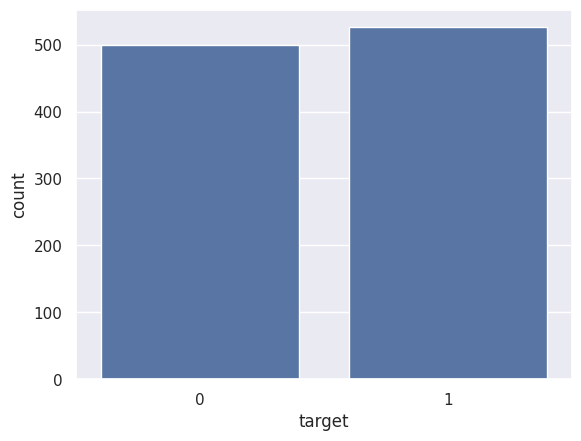

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x="target",data=df,order=df["target"].value_counts(ascending=True).index)


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop("target",axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train

In [ ]:
x_train.shape,y_train.shape

((820, 13), (820,))

In [ ]:
x_test.shape,y_test.shape

((205, 13), (205,))

# Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_lr.shape

(205,)

In [ ]:
score_lr = accuracy_score(y_test,y_pred_lr)*100
score_lr

86.34146341463415

# 2. Naive Baiyes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)


In [ ]:
y_pred_nb.shape

(205,)

In [ ]:
score_nb = round(accuracy_score(y_test,y_pred_nb)*100,2)
score_nb

85.37

# 3. SVM

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='linear')

svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

In [ ]:
y_pred_svm.shape

(205,)

In [ ]:
score_svm = accuracy_score(y_test,y_pred_svm)*100
score_svm

83.90243902439025

# 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
y_pred_knn.shape

(205,)

In [ ]:
score_knn = accuracy_score(y_test,y_pred_knn)*100
score_knn

72.1951219512195

# 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0

for i in range(200):
  dt = DecisionTreeClassifier(random_state=i)
  dt.fit(x_train,y_train)

  y_pred_dt = dt.predict(x_test)
  current_accuracy = round(accuracy_score(y_test,y_pred_dt)*100,2)
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_x = i

print(max_accuracy)
print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

100.0
0


In [ ]:
y_pred_dt.shape

(205,)

In [ ]:
score_dt = accuracy_score(y_pred_dt,y_test)
score_dt

NameError: name 'accuracy_score' is not defined

# 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for i in range(2000):
    rf = RandomForestClassifier(random_state=i)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = i
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
score_rf

100.0

# 7. XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

In [ ]:
score_xgb = accuracy_score(y_pred_xgb,y_test)*100
score_xgb

100.0

# 8. Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
26/26 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8024
Epoch 2/3
26/26 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8122
Epoch 3/3
26/26 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8183


In [ ]:
y_pred_nn = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
y_pred_nn.shape

(205, 1)

In [ ]:
rounded = [round(x[0]) for x in y_pred_nn]
y_pred_nn = rounded

In [ ]:
score_nn = accuracy_score(y_pred_nn,y_test)*100
score_nn

86.34146341463415

# Output Final Score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","KNN","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34146341463415 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.90243902439025 %
The accuracy score achieved using KNN is: 72.1951219512195 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 86.34146341463415 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

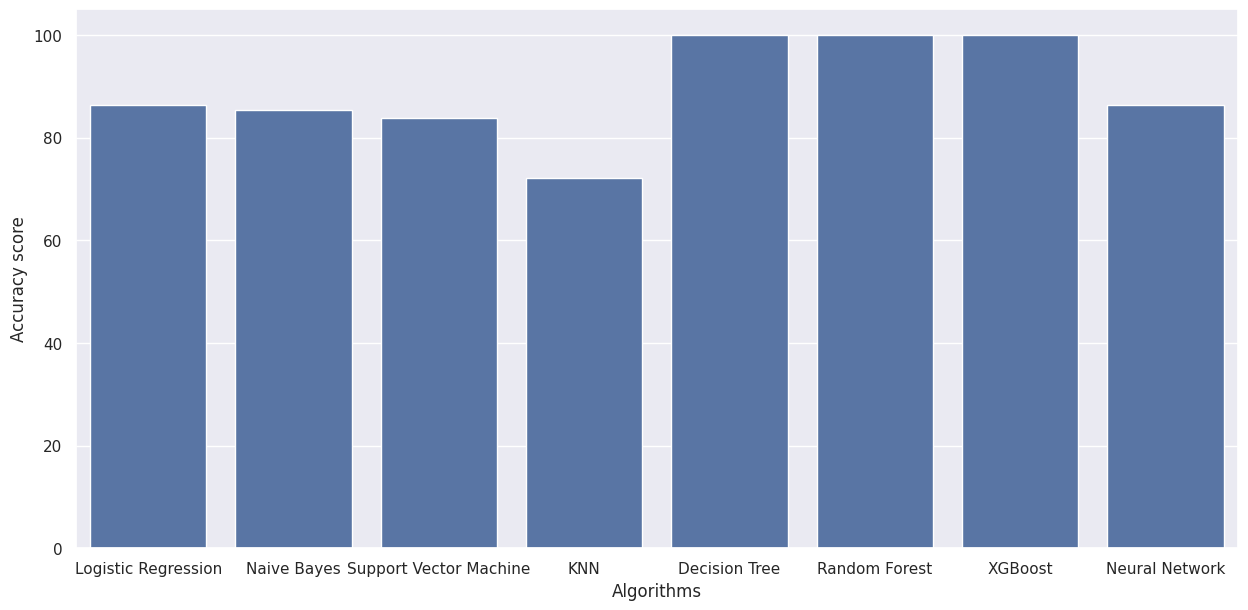

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [ ]:
x_train


NameError: name 'x_train' is not defined